In [29]:
import pandas as pd


df=pd.read_csv("predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [30]:
df.info()
print("deccribe")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
deccribe


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [31]:
df = df.drop(columns=['UDI', 'Product ID'])
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [32]:
type_order = ['L', 'M', 'H']
oe = OrdinalEncoder(categories=[type_order])
df['Type_Encoded'] = oe.fit_transform(df[['Type']])
print(df['Type_Encoded'])

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    1.0
9996    2.0
9997    1.0
9998    2.0
9999    1.0
Name: Type_Encoded, Length: 10000, dtype: float64


In [33]:
df['Final_Failure'] = df['Failure Type']
df.loc[df['Target'] == 0, 'Final_Failure'] = 'No Failure'

# 5. Encode target labels
le = LabelEncoder()
df['Final_Failure_Encoded'] = le.fit_transform(df['Final_Failure'])

print("Classes:", le.classes_)
print(df['Final_Failure'].value_counts())


Classes: ['Heat Dissipation Failure' 'No Failure' 'Overstrain Failure'
 'Power Failure' 'Tool Wear Failure']
Final_Failure
No Failure                  9670
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: count, dtype: int64


In [36]:
X = df.drop(columns=['Type', 'Failure Type', 'Target', 'Final_Failure', 'Final_Failure_Encoded'])
y = df['Final_Failure_Encoded']
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_Encoded,Final_Failure,Final_Failure_Encoded
0,M,298.1,308.6,1551,42.8,0,0,No Failure,1.0,No Failure,1
1,L,298.2,308.7,1408,46.3,3,0,No Failure,0.0,No Failure,1
2,L,298.1,308.5,1498,49.4,5,0,No Failure,0.0,No Failure,1
3,L,298.2,308.6,1433,39.5,7,0,No Failure,0.0,No Failure,1
4,L,298.2,308.7,1408,40.0,9,0,No Failure,0.0,No Failure,1


In [39]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])
X.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_Encoded
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0.744413
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,-0.745307
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,-0.745307
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.745307
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.745307


In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  float64
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  float64
 5   Type_Encoded             10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [45]:
X.head()



,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_Encoded
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0.744413
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,-0.745307
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,-0.745307
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.745307
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.745307


In [46]:
print("Y")
y.head()

Y


,Final_Failure_Encoded
0,1
1,1
2,1
3,1
4,1


In [49]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Before balancing:", y.value_counts().to_dict(),"length of org data set",len(y))
print("After balancing:", pd.Series(y_res).value_counts().to_dict())

print(len(X_res))
print(len(y_res))

Before balancing: {1: 9670, 0: 112, 3: 95, 2: 78, 4: 45} length of org data set 10000
After balancing: {1: 9670, 3: 9670, 4: 9670, 2: 9670, 0: 9670}
48350
48350


In [ ]:
import pandas as pd
import numpy as np

# Example dataset 
data = { 
    "Target": [0, 1, 1, 1, 1, 1], 
    "TWF":    [0, 1, 0, 0, 0, 0], 
    "HDF":    [0, 0, 1, 0, 0, 0], 
    "PWF":    [0, 0, 0, 1, 0, 0], 
    "OSF":    [0, 0, 0, 0, 1, 0], 
    "RNF":    [0, 0, 0, 0, 0, 1] 
} 
df = pd.DataFrame(data)

# Define conditions and corresponding labels
conditions = [
    (df["Target"] == 0),
    (df["TWF"] == 1),
    (df["HDF"] == 1),
    (df["PWF"] == 1),
    (df["OSF"] == 1),
    (df["RNF"] == 1)
]

choices = [
    "No Failure", 
    "Tool Wear Failure", 
    "Heat Dissipation Failure", 
    "Power Failure", 
    "Overstrain Failure", 
    "Random Failure"
]

# Apply mapping using np.select
df["Failure Type"] = np.select(conditions, choices, default="Unknown")

print(df[["Target", "Failure Type"]])

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00      1934
              No Failure       1.00      0.97      0.99      1934
      Overstrain Failure       1.00      1.00      1.00      1934
           Power Failure       1.00      1.00      1.00      1934
       Tool Wear Failure       0.98      1.00      0.99      1934

                accuracy                           0.99      9670
               macro avg       0.99      0.99      0.99      9670
            weighted avg       0.99      0.99      0.99      9670



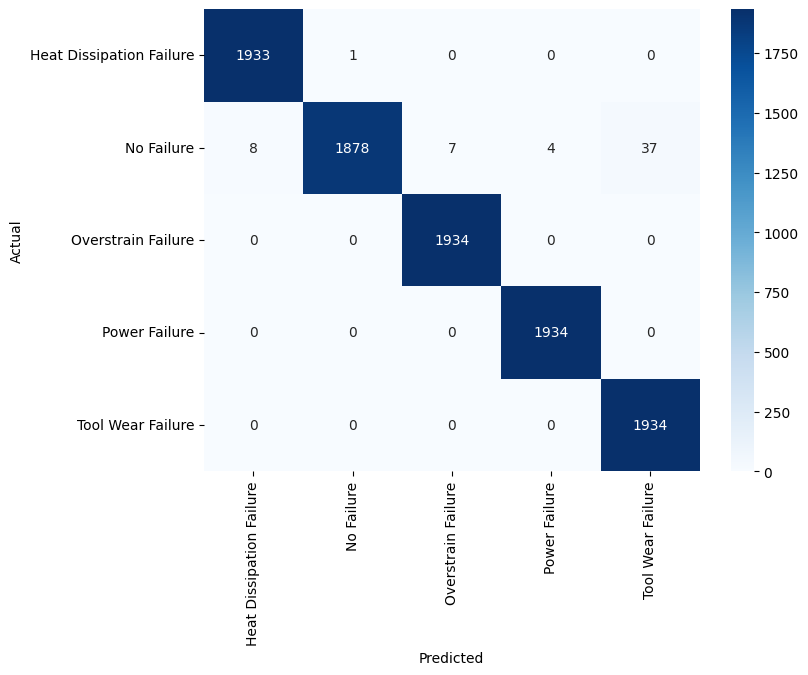

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split balanced dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Train model (Random Forest as example)
clf = RandomForestClassifier(random_state=42, class_weight="balanced")
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [51]:
print("Train Accuracy:", clf.score(X_train, y_train))
print("Test Accuracy:", clf.score(X_test, y_test))


Train Accuracy: 1.0
Test Accuracy: 0.994105480868666


In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_res, y_res, cv=5)
print("Cross-val scores:", scores)
print("Mean CV accuracy:", scores.mean())


Cross-val scores: [0.98945191 0.98924509 0.97838676 0.99027921 0.99617373]
Mean CV accuracy: 0.9887073422957601


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
    # "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train & Evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

# Show results
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")


Logistic Regression: 0.9571
Decision Tree: 0.9922
Random Forest: 0.9941
SVM: 0.9810


In [58]:
import pickle

# Dictionary of models to save
models_to_save = {
    "Logistic Regression": models["Logistic Regression"],
    "Random Forest": models["Random Forest"],
    "Random Forest Classifier" : models["Random Forest"]
}

# Save each model to a pickle file
for name, model in models_to_save.items():
    filename = f"{name.lower().replace(' ', '_')}_model.pkl"
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"Saved {name} model to {filename}")

Saved Logistic Regression model to logistic_regression_model.pkl
Saved Random Forest model to random_forest_model.pkl
Saved Random Forest Classifier model to random_forest_classifier_model.pkl


In [59]:
import numpy as np
import pickle

# Load the saved model (using the Random Forest model as an example)
try:
    with open('random_forest_model.pkl', 'rb') as f:
        loaded_model = pickle.load(f)
    print("Random Forest model loaded successfully.")
except FileNotFoundError:
    print("Error: random_forest_model.pkl not found. Please ensure you have run the cell to save the models.")
    loaded_model = None # Set loaded_model to None if the file is not found

if loaded_model:
    # Prepare sample input data as a NumPy array
    # This array should have the same number of features as your training data (X_res)
    # and be scaled in the same way.
    # Replace the values below with your desired input data.
    # Example input data (replace with actual values you want to test):
    sample_input = np.array([[
        0.5,   # Air temperature [K] (scaled)
        0.8,   # Process temperature [K] (scaled)
        -0.2,  # Rotational speed [rpm] (scaled)
        1.5,   # Torque [Nm] (scaled)
        0.1,   # Tool wear [min] (scaled)
        1.0    # Type_Encoded (scaled)
    ]])

    # Make a prediction
    prediction_encoded = loaded_model.predict(sample_input)

    # Decode the prediction back to the original failure type label
    # You'll need the LabelEncoder fitted to your original failure types
    # Assuming 'le' from cell SbLsE8VaVWBT is available
    try:
        predicted_failure_type = le.inverse_transform(prediction_encoded)
        print(f"Predicted Failure Type (encoded): {prediction_encoded}")
        print(f"Predicted Failure Type: {predicted_failure_type[0]}")
    except NameError:
        print("Error: LabelEncoder 'le' not found. Please ensure the cell to encode target labels has been run.")

Random Forest model loaded successfully.
Predicted Failure Type (encoded): [1]
Predicted Failure Type: No Failure


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
